# This program teaches a computer (robot) how to tell what kind of flower it is.
# It learns from examples, then shows how good it did using a colorful graph.

In [ ]:
# 📚 Importing useful tools (libraries) for our project

from sklearn.datasets import load_iris       # Loads a famous dataset of iris flowers (measurements + flower names)
from sklearn.model_selection import train_test_split  # Splits the dataset into two parts: training and testing
from sklearn.tree import DecisionTreeClassifier       # Our "learning brain" that finds patterns in data
from sklearn.metrics import accuracy_score, precision_score, recall_score  # Tools to measure how well our model performs
import pandas as pd                                 # Makes it easy to handle and explore data in table form
# import seaborn as sns                             # (Optional) Used for making pretty graphs
import matplotlib.pyplot as plt                     # Helps us draw charts and graphs to see results visually


# 🌸 Step 1: Load the Iris flower dataset
iris = load_iris()              # Load the dataset directly from scikit-learn

# 🌿 Step 2: Separate the data into features and labels
X = iris.data                   # X contains the flower measurements (petal and sepal lengths and widths)
y = iris.target                 # y contains the correct flower type for each measurement
                                # 0 = Setosa, 1 = Versicolor, 2 = Virginica

# 👀 Step 3: Take a quick look at the data
print("Checking our flower data...")
print(f"We have {len(X)} flowers to learn from!")     # Prints how many total flower examples we have
print(f"Flower types: {iris.target_names}")           # Shows the names of all flower types in the dataset


Checking our flower data...
We have 150 flowers to learn from!
Flower types: ['setosa' 'versicolor' 'virginica']


In [14]:
# Split the data
# We divide the dataset so the model can learn from one part and be tested on another.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42                # 80% train, 20% test for fair evaluation
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 120, Testing samples: 30


In [15]:
#Train the Decision Tree model
print("Training the flower classification model...")
flower_robot = DecisionTreeClassifier()                 # Create the model
flower_robot.fit(X_train, y_train)                      # Train it using the training data
print("Model training complete")

Training the flower classification model...
Model training complete


In [27]:
#Test the model
# Use the test data to see how well the model performs.
predictions = flower_robot.predict(X_test)              # Make predictions

# Calculate key performance metrics
accuracy = accuracy_score(y_test, predictions)          # Overall correctness
precision = precision_score(y_test, predictions, average='weighted')  # How accurate the predictions are
recall = recall_score(y_test, predictions, average='weighted')        # How many true cases it found

# Print performance results
print("\nModel Performance Summary:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Model Performance Summary:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00



Creating performance graph...


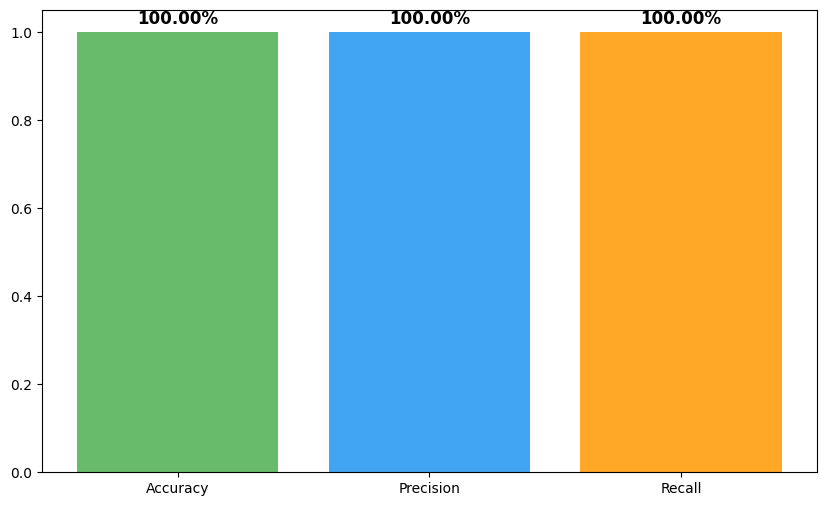

In [28]:
# Visualize the performance
print("\nCreating performance graph...")

metrics = ['Accuracy', 'Precision', 'Recall']            # Names of metrics
scores = [accuracy, precision, recall]                   # Their values
colors = ['#4CAF50', '#2196F3', '#FF9800']               # Chart colors

plt.figure(figsize=(10, 6))                              # Set graph size
bars = plt.bar(metrics, scores, color=colors, alpha=0.85) # Draw bars

# Label each bar with its score
for bar, score in zip(bars, scores):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f'{score:.2%}',                                  # Convert score to percentage
        ha='center', va='bottom',
        fontsize=12, fontweight='bold'
    )


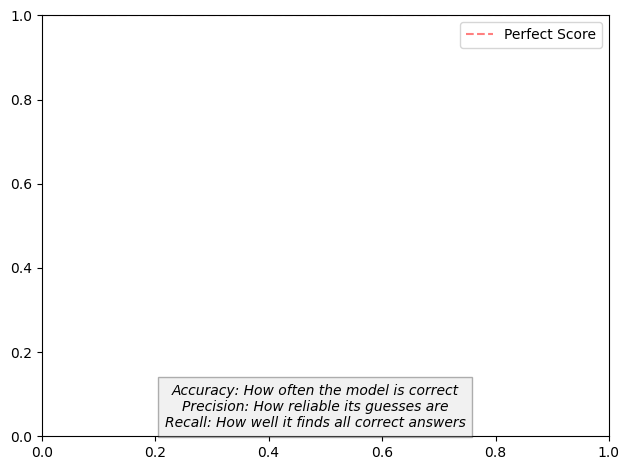


 Performance graph displayed successfully!
 The bars show how well your model performed overall.


In [38]:
# Add reference line and legend
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Perfect Score')
plt.legend()

# Add short explanations for the metrics
plt.figtext(
    0.5, 0.10,
    'Accuracy: How often the model is correct\n'
    'Precision: How reliable its guesses are\n'
    'Recall: How well it finds all correct answers',
    ha='center', fontsize=10, style='italic',
    bbox={'facecolor': 'lightgray', 'alpha': 0.3, 'pad': 5}
)

plt.tight_layout()
plt.show()

print("\n Performance graph displayed successfully!")
print(" The bars show how well your model performed overall.")